In [1]:
# Initial imports
import numpy as np
import pandas as pd
from pathlib import Path

%matplotlib inline

In [2]:
 # Set path to CSV and read in CSV
csv_path = Path("DATA/ETH/ETH_DATA.csv")
eth_df=pd.read_csv(csv_path)

In [3]:
 # Set index as Date
eth_df = eth_df.set_index(pd.to_datetime(eth_df["Date"], infer_datetime_format=True))

# Display sample data
eth_df.head(10)

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,,
2015-08-09,ETH,2015-08-09,0.909046,1.749289,1.916540,0.794497
2015-08-10,ETH,2015-08-10,0.692321,0.909046,0.909046,0.692321
2015-08-11,ETH,2015-08-11,0.668067,0.692321,0.692321,0.654331
2015-08-12,ETH,2015-08-12,0.850151,0.668067,1.148621,0.668067
2015-08-13,ETH,2015-08-13,1.266023,0.850151,1.266023,0.850151
2015-08-14,ETH,2015-08-14,1.951460,1.266023,2.073329,1.149458
2015-08-15,ETH,2015-08-15,1.591219,1.951460,2.225695,1.591219
2015-08-16,ETH,2015-08-16,1.693707,1.591219,1.768860,1.591219
2015-08-17,ETH,2015-08-17,1.423244,1.693707,1.693707,1.099489


In [4]:
#check for na
eth_df.isnull().values.any()

False

In [5]:
# Set the random seed to (2)
from numpy.random import seed

seed(1)
from tensorflow import random

random.set_seed(2)

In [6]:
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window):
        features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [7]:
# Define the window size
window_size = 9

# Set the index of the feature and target columns
feature_column = 2
target_column = 2

# Create the features (X) and target (y) data using the window_data() function.
X, y = window_data(eth_df, window_size, feature_column, target_column)

# Print a few sample values from X and y
print (f"X sample values:\n{X[:3]} \n")
print (f"y sample values:\n{y[:3]}")

X sample values:
[[0.909046 0.692321 0.668067 0.850151 1.266023 1.95146  1.591219 1.693707
  1.423244]
 [0.692321 0.668067 0.850151 1.266023 1.95146  1.591219 1.693707 1.423244
  1.199595]
 [0.668067 0.850151 1.266023 1.95146  1.591219 1.693707 1.423244 1.199595
  1.182837]] 

y sample values:
[[1.199595]
 [1.182837]
 [1.279549]]


In [8]:
 # Manually splitting the data
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [9]:
 # Importing the MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the features data X
scaler.fit(X)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the target data Y
scaler.fit(y)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [10]:
 # Reshape the features data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Print some sample data after reshaping the datasets
print (f"X_train sample values:\n{X_train[:3]} \n")
print (f"X_test sample values:\n{X_test[:3]}")

X_train sample values:
[[[1.16315033e-04]
  [6.38688232e-05]
  [5.79994940e-05]
  [1.02062780e-04]
  [2.02701423e-04]
  [3.68573253e-04]
  [2.81396994e-04]
  [3.06198503e-04]
  [2.40748005e-04]]

 [[6.38688232e-05]
  [5.79994940e-05]
  [1.02062780e-04]
  [2.02701423e-04]
  [3.68573253e-04]
  [2.81396994e-04]
  [3.06198503e-04]
  [2.40748005e-04]
  [1.86626227e-04]]

 [[5.79994940e-05]
  [1.02062780e-04]
  [2.02701423e-04]
  [3.68573253e-04]
  [2.81396994e-04]
  [3.06198503e-04]
  [2.40748005e-04]
  [1.86626227e-04]
  [1.82570887e-04]]] 

X_test sample values:
[[[0.04090703]
  [0.04379478]
  [0.04364628]
  [0.04663782]
  [0.0464072 ]
  [0.04369936]
  [0.0436468 ]
  [0.04382717]
  [0.04493723]]

 [[0.04379478]
  [0.04364628]
  [0.04663782]
  [0.0464072 ]
  [0.04369936]
  [0.0436468 ]
  [0.04382717]
  [0.04493723]
  [0.04359566]]

 [[0.04364628]
  [0.04663782]
  [0.0464072 ]
  [0.04369936]
  [0.0436468 ]
  [0.04382717]
  [0.04493723]
  [0.04359566]
  [0.04218582]]]


In [11]:
 # Importing required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [12]:
# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = 9
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [14]:
 # Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [15]:
# Show the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 9, 9)              396       
_________________________________________________________________
dropout (Dropout)            (None, 9, 9)              0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 9, 9)              684       
_________________________________________________________________
dropout_1 (Dropout)          (None, 9, 9)              0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 9)                 684       
_________________________________________________________________
dropout_2 (Dropout)          (None, 9)                 0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [16]:
# Train the model
model.fit(X_train, y_train, epochs=20, shuffle=False, batch_size=90, verbose=1)

Epoch 1/20
17/17 [==============================] - 7s 8ms/step - loss: 0.0034
Epoch 2/20
17/17 [==============================] - 0s 8ms/step - loss: 0.0032
Epoch 3/20
17/17 [==============================] - 0s 8ms/step - loss: 0.0029
Epoch 4/20
17/17 [==============================] - 0s 7ms/step - loss: 0.0022
Epoch 5/20
17/17 [==============================] - 0s 7ms/step - loss: 0.0018
Epoch 6/20
17/17 [==============================] - 0s 7ms/step - loss: 0.0013
Epoch 7/20
17/17 [==============================] - 0s 8ms/step - loss: 6.5026e-04
Epoch 8/20
17/17 [==============================] - 0s 7ms/step - loss: 5.0605e-04
Epoch 9/20
17/17 [==============================] - 0s 7ms/step - loss: 4.4086e-04
Epoch 10/20
17/17 [==============================] - 0s 8ms/step - loss: 4.8852e-04
Epoch 11/20
17/17 [==============================] - 0s 7ms/step - loss: 4.2717e-04
Epoch 12/20
17/17 [==============================] - 0s 8ms/step - loss: 4.1630e-04
Epoch 13/20
17/17 [======

In [17]:
 # Evaluate the model
model.evaluate(X_test, y_test, verbose=0)

0.0040833125822246075

In [18]:
 # Make predictions using the testing data X_test
predicted = model.predict(X_test)

In [19]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [20]:
 # Create a DataFrame of Real and Predicted values
eth_eval = pd.DataFrame({
    "Actual": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = eth_df.index[-len(real_prices): ]) 

# Show the DataFrame's head
eth_eval.head()

,Actual,Predicted
Date,,
2019-10-15,180.580000,176.235031
2019-10-16,174.754083,178.703690
2019-10-17,176.390105,179.010590
2019-10-18,173.750089,179.202347
2019-10-19,171.158513,177.022202


<AxesSubplot:title={'center':'Actual Vs. Predicted ETH Prices'}, xlabel='Date'>

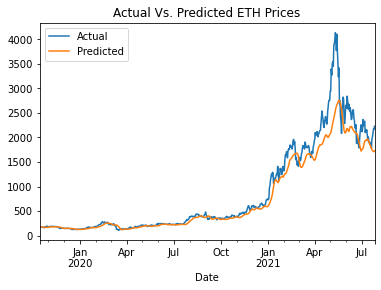

In [21]:
 # Plot the real vs predicted prices as a line chart
eth_eval.plot(title="Actual Vs. Predicted ETH Prices")

In [22]:
#seprate actual and pred
Pred= eth_eval['Actual']
act= eth_eval['Predicted']

#model eval
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(act, Pred))
print(math.sqrt(mean_squared_error(act, Pred)))
print(mean_absolute_error(act, Pred))

69727.23630431812
264.0591530402196
127.81797165086667
